In [1]:
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-top-half.png.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-resized-bottom-half.png.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/alsimap_smooth_032015.png.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/casimap_smooth_032015.png.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/fesimap_smooth_032015.png.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mgsimap_smooth_032015.png.csv
!wget https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/ssimap_smooth_032015.png.csv

--2021-03-29 07:41:46--  https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-top-half.png.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25920000 (25M) [text/plain]
Saving to: ‘mercury-albedo-top-half.png.csv’

mercury-albedo-top- 100%[===================>]  24.72M  82.4MB/s    in 0.3s    

2021-03-29 07:41:46 (82.4 MB/s) - ‘mercury-albedo-top-half.png.csv’ saved [25920000/25920000]

--2021-03-29 07:41:46--  https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/mercury-albedo-resized-bottom-half.png.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
try:
  del mer_albedo_top, mer_albedo_bottom
  del mgsi, ssi, fesi, alsi, casi
  print("Cleared previously loaded variables")
except:
  pass

albedo_top = pd.read_csv("mercury-albedo-top-half.png.csv", header=None) # Training part
albedo_bottom = pd.read_csv("mercury-albedo-resized-bottom-half.png.csv", header=None) # Testing part
mgsi = pd.read_csv("mgsimap_smooth_032015.png.csv", header=None)
ssi = pd.read_csv("ssimap_smooth_032015.png.csv", header=None)
fesi = pd.read_csv("fesimap_smooth_032015.png.csv", header=None)
alsi = pd.read_csv("alsimap_smooth_032015.png.csv", header=None)
casi = pd.read_csv("casimap_smooth_032015.png.csv", header=None)

In [5]:
# Set plotting parameters
plt.style.use("seaborn")
cmap = plt.get_cmap('jet', 20)

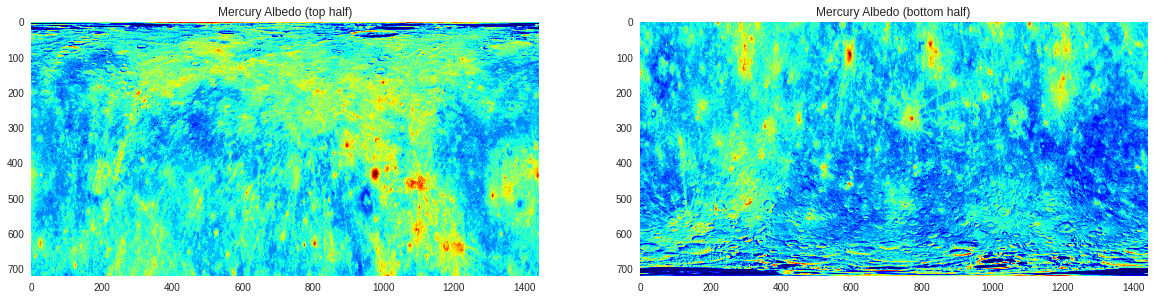

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(albedo_top, cmap=cmap)
axs[0].grid(False)
axs[0].set_title("Mercury Albedo (top half)")

axs[1].imshow(albedo_bottom, cmap=cmap)
axs[1].grid(False)
axs[1].set_title("Mercury Albedo (bottom half)")

plt.show()

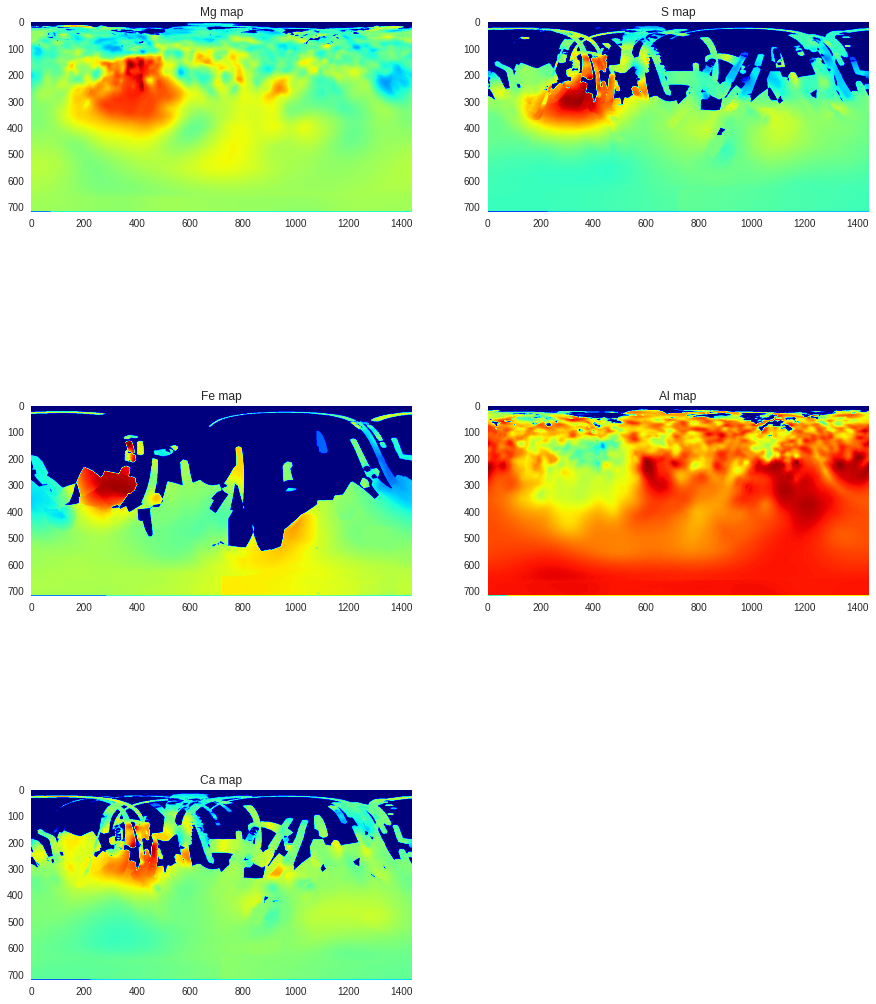

In [22]:
fig = plt.figure(figsize=(15, 20))

# Set some plotting parameters
sm = plt.cm.ScalarMappable(cmap=cmap)
cbar_ax = fig.add_axes([0.75, 0.10, 0.02, 0.40])
fig.colorbar(sm, cax=cbar_ax)

ax1 = plt.subplot2grid((3, 2), (0, 0))
ax1.set_title("Mg map")
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax2.set_title("S map")
ax3 = plt.subplot2grid((3, 2), (1, 0))
ax3.set_title("Fe map")
ax4 = plt.subplot2grid((3, 2), (1, 1))
ax4.set_title("Al map")
ax5 = plt.subplot2grid((3, 2), (2, 0))
ax5.set_title("Ca map")

plt.subplots_adjust()

ax1.imshow(mgsi.to_numpy(), cmap='jet')
ax1.grid(False)

ax2.imshow(ssi.to_numpy(), cmap='jet')
ax2.grid(False)

ax3.imshow(fesi.to_numpy(), cmap='jet')
ax3.grid(False)

ax4.imshow(alsi.to_numpy(), cmap='jet')
ax4.grid(False)

ax5.imshow(casi.to_numpy(), cmap='jet')
ax5.grid(False)

plt.show()

Some claims/points from the paper: https://www.sciencedirect.com/science/article/abs/pii/S001910352030107X that can be verified are:

- There is a higher detection of S and Ca (orange-red color region) in the regions of high Mg concentration (orange-red section on the Mg map). Moreover, it is partially true also for Fe.
- The S and Ca maps look very similar and hence are correlated with each other. This might be an evidence for the presence of the mineral oldhamite (CaS) as stated in the paper.

In [45]:
if isinstance(albedo_top, pd.DataFrame):
  albedo_top = albedo_top.to_numpy()
if isinstance(albedo_top, pd.DataFrame):
  albedo_bottom = albedo_bottom.to_numpy()

def create_dataset(albedo_ut, s_ut, fe_ut, al_ut, ca_ut, mg_ut):
  """
  Parameters:
  -----------
  Input: NumPy arrays
  
  Returns a list of dataframe objects 
  """

  albedo = albedo_ut.reshape(-1, 1).squeeze()
  s = s_ut.reshape(-1, 1).squeeze()
  fe = fe_ut.reshape(-1, 1).squeeze()
  al = al_ut.reshape(-1, 1).squeeze()
  ca = ca_ut.reshape(-1, 1).squeeze()
  mg = mg_ut.reshape(-1, 1).squeeze()

  return np.array([albedo, s, fe, al, ca, mg])

In [46]:
ssi_top, fesi_top, alsi_top, casi_top, mgsi_top = np.array(ssi), np.array(fesi), np.array(alsi), np.array(casi), np.array(mgsi)
train_data = pd.DataFrame(create_dataset(albedo_top, ssi_top, fesi_top, alsi_top, casi_top, mgsi_top).T)
train_data.rename(columns={0: "Albedo", 1: "S", 2: "Fe", 3: "Al", 4: "Ca", 5: "Mg"}, inplace=True)

In [47]:
test_data = pd.DataFrame(albedo_bottom.reshape(-1, 1).squeeze().T)
test_data.rename(columns={0: "Albedo"}, inplace=True)

In [49]:
test_data # Feature

,Albedo
0,0.321569
1,0.360784
2,0.392157
3,0.341176
4,0.298039
...,...
1036795,0.188235
1036796,0.188235
1036797,0.192157
1036798,0.196078


We could try running similar machine learning algorithms (as trained in the first task). It would be interesting to gauge the performance of those models for this task for a baseline.

In [223]:
from sklearn.multioutput import MultiOutputRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import LinearSVR
import xgboost as xgb

In [224]:
x_train = np.array(train_data[train_data.columns[0]])
x_train = x_train.reshape(-1, 1)
y_train = np.array(train_data[train_data.columns[1:]])
x_test = np.array(test_data["Albedo"]).reshape(-1, 1)

In [225]:
models = [("xgbreg", xgb.XGBRegressor)]

def exp_all_models(x_train, y_train, x_test, models):
  errors = list()
  predictions = list()
  for name, model in models:
    if name == "xgbreg":
      model_ = model(objective="reg:squarederror", colsample_bytree=0.3, learning_rate=0.1, 
                     max_depth=5, alpha=10, n_estimators=400)
    else:
      model_ = model()  
    model_ = MultiOutputRegressor(model_)
    model_.fit(x_train, y_train)
    prediction = model_.predict(x_test)
    predictions.append(prediction)

  return predictions

In [226]:
try:
  del s_list, fe_list, al_list, ca_list, mg_list
except:
  pass

In [227]:
shape = (720, 1440)

predictions = exp_all_models(x_train, y_train, x_test, models)

s_list = list()
fe_list = list() 
al_list = list() 
ca_list = list() 
mg_list = list()
for pred in predictions:
  s = pred[:, 0].reshape(shape)
  s_list.append(s)
  fe = pred[:, 1].reshape(shape)
  fe_list.append(fe)
  al = pred[:, 2].reshape(shape)
  al_list.append(al)
  ca = pred[:, 3].reshape(shape)
  ca_list.append(ca)
  mg = pred[:, 4].reshape(shape)
  mg_list.append(mg)

Observations:
- Training on a `XGBoost` regressor takes a significant amount of time. As a result, it might be a good idea to use xgboost's `DMatrix` data structure which optimizes memory and training time.
- We could build a more robust model using cross validation on this regressor.

The order of set of plots is: LinearRegression, LinearSVR, XGBoostRegressor, `RandomForestRegressor`.

The predictions from the `XGBoostRegressor` are going to be used for the final albedo prediction due to their superior performance in predicting albedo on moon. The predictions from the other regressors are just plotted for analysis.

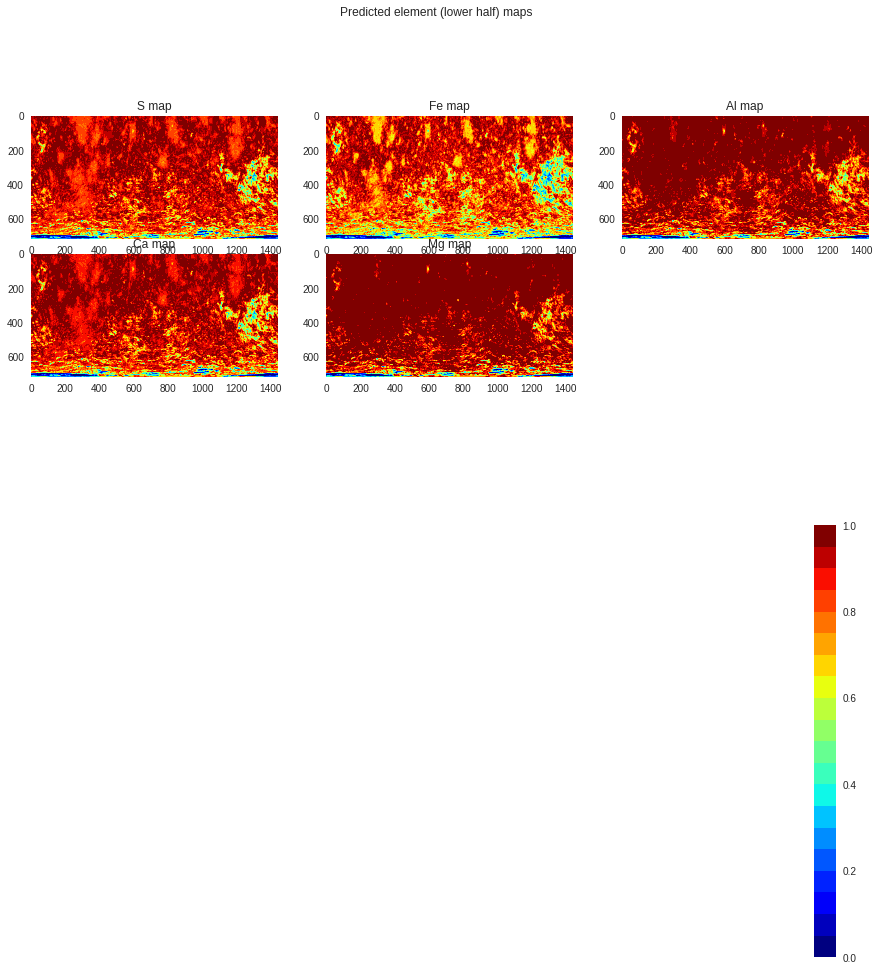

In [231]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle("Predicted element (lower half) maps")

# Set some plotting parameters
cmap = plt.get_cmap('jet', 20)
sm = plt.cm.ScalarMappable(cmap=cmap)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.40])
fig.colorbar(sm, cax=cbar_ax)

# XGBoost Regression
ax1_ = plt.subplot2grid((6, 3), (0, 0))
ax1_.set_title("S map")
ax2_ = plt.subplot2grid((6, 3), (0, 1))
ax2_.set_title("Fe map")
ax3_ = plt.subplot2grid((6, 3), (0, 2))
ax3_.set_title("Al map")
ax4_ = plt.subplot2grid((6, 3), (1, 0))
ax4_.set_title("Ca map")
ax5_ = plt.subplot2grid((6, 3), (1, 1))
ax5_.set_title("Mg map")

plt.subplots_adjust(wspace = 0.2, hspace = 0.1)

ax1_.imshow(s_list[0], cmap=cmap)
ax1_.grid(False)

ax2_.imshow(fe_list[0], cmap=cmap)
ax2_.grid(False)

ax3_.imshow(al_list[0], cmap=cmap)
ax3_.grid(False)

ax4_.imshow(ca_list[0], cmap=cmap)
ax4_.grid(False)

ax5_.imshow(mg_list[0], cmap=cmap)
ax5_.grid(False)

plt.show()

As per the paper, the mercury's crust is rich in Mg and S, but poor in the other elements (Al, Ca, Fe).

From the predicted chemical composition it seems that all the maps have some similarity between them, and although it predicted the high concentration of Mg and S, it also modeled the composition of the other elements in a similar fashion, thus failing to reproduce lower concentrations of Al, Ca, and Fe:

Unlike for the case of moon, a more sophisticated architecture might be needed to split the degeneracy of element maps and to match the observational ground-truth.

Using this chemical composition map, we could predict the albedo and compare with the observed albedo map. Since machine learning techniques rely on data heavily, we could expect the final results to be slightly sub-optimal.

Some analysis that was not shown here:
- If a `LinearSVR` model is fitted, it does seem to converge for this data (unlike for the moon maps).
- The resulting maps from different regressors (`LinearSVR`, `LinearRegression`) seem to be similar to the `XGBoostRegressor` version.

In [232]:
test_elements = pred # lower half
test_albedo = albedo_bottom # lower half
train_elements = train_data[train_data.columns[1:]].to_numpy() # upper half
train_albedo = train_data[train_data.columns[0]]

Tree based regressors have proven their ability to identify relationship between chemical composition and albedo. Hence, we are using a `XGBoostRegressor` for the final albedo prediction.

In [233]:
xgbmodel = xgb.XGBRegressor(objective="reg:squarederror", colsample_bytree=0.3, learning_rate=0.1, 
                     max_depth=5, alpha=10, n_estimators=400)
xgbmodel.fit(train_elements, train_albedo)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [234]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def metric_eval(y_test, prediction, metric="rmse"):
  """
  metric: 'mse' or 'mae' or 'rmse', default to 'rmse'
  """

  if metric == "mse":
    error = mean_squared_error(y_test, prediction)
  elif metric == "mae":
    error = mean_absolute_error(y_test, prediction)
  else:
    error = mean_squared_error(y_test, prediction, squared=False)
  
  return error

In [235]:
final_albedo_pred = xgbmodel.predict(test_elements)
error = metric_eval(test_albedo, final_albedo_pred.reshape(shape))

In [236]:
print(f"rmse: {error}")

rmse: 0.16065340318377683


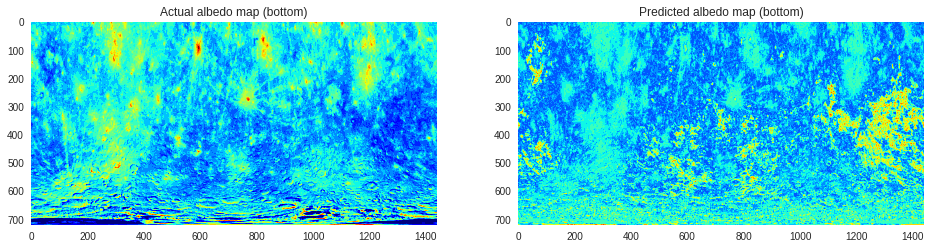

In [237]:
fig_, axes_ = plt.subplots(1, 2, figsize=(16, 8))

axes_[0].imshow(albedo_bottom, cmap=cmap)
axes_[0].grid(False)
axes_[0].set_title("Actual albedo map (bottom)")

axes_[1].imshow(final_albedo_pred.reshape(shape), cmap=cmap)
axes_[1].grid(False)
axes_[1].set_title("Predicted albedo map (bottom)")

plt.show()

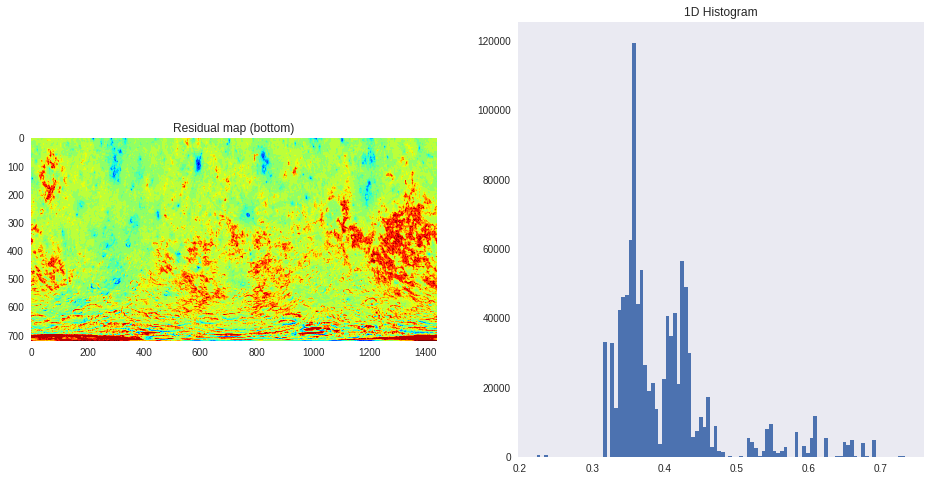

In [238]:
residual_albmap = final_albedo_pred.reshape(shape) - albedo_bottom
n_bins = 100

fig_, axes_ = plt.subplots(1, 2, figsize=(16, 8))

axes_[0].imshow(residual_albmap, cmap=cmap)
axes_[0].grid(False)
axes_[0].set_title("Residual map (bottom)")

axes_[1].hist(final_albedo_pred.reshape(shape).flatten(), bins=n_bins)
axes_[1].grid(False)
axes_[1].set_title("1D Histogram")

plt.show()

### Analysis
---
The result above is a consequence of the inaccurate prediction of the chemical composition maps.

Deep learning architectures can potentially be able to find and learn patterns between features and albedo on mercury. It is also evident that learning patterns on mercury maps is slightly difficult for traditional machine learning architectures (unlike moon maps), especially because the element ratio maps didn't had full coverage throughout the field.